In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.metrics import structural_similarity

In [2]:
models = []

In [3]:
def draw_picture(image, n_image, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(16)
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax2.imshow(cv2.cvtColor(n_image, cv2.COLOR_BGR2RGB))
    ax1.axis('off')
    ax2.axis('off')
    ssim = structural_similarity(image, n_image, channel_axis=2)
    fig.suptitle(f'{title}\nssim={ssim:0.4f}')
    plt.show()
    models.append((title, ssim))

In [4]:
image = cv2.imread('image13.jpg')


In [5]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering


In [6]:
def cluster_centers_(X, labels):
    center = []
    for i in set(labels):
        if i == -1:
            continue
        c = np.mean(X[labels==i], axis=0)
        center.append(c)
    return np.array(center)


In [7]:
def classify_image(model, image, title):
    model.fit(
        image.reshape(-1, 3)
    )
    cluster_centers = cluster_centers_(image.reshape(-1, 3), model.labels_)
    n_image = np.array(
        [cluster_centers[i] if i != -1 else [0, 0, 0] for i in model.labels_],
        dtype=np.uint8
    ).reshape(image.shape)
    draw_picture(image, n_image, title)
    
    

/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


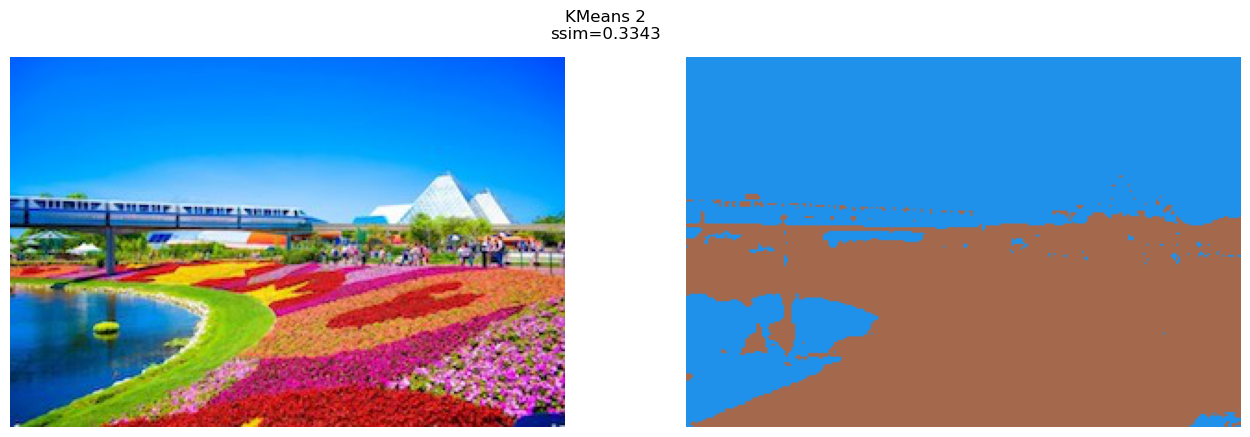

/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


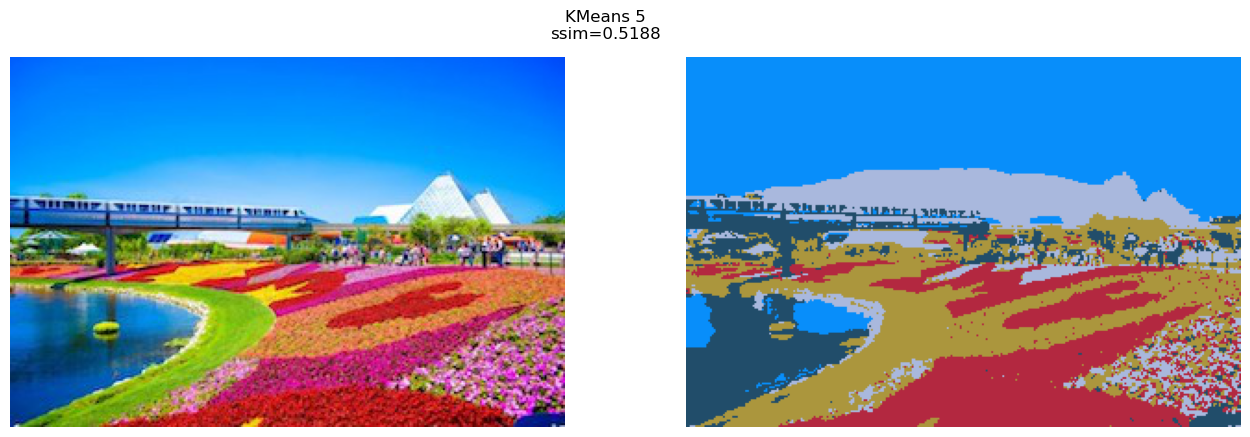

/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


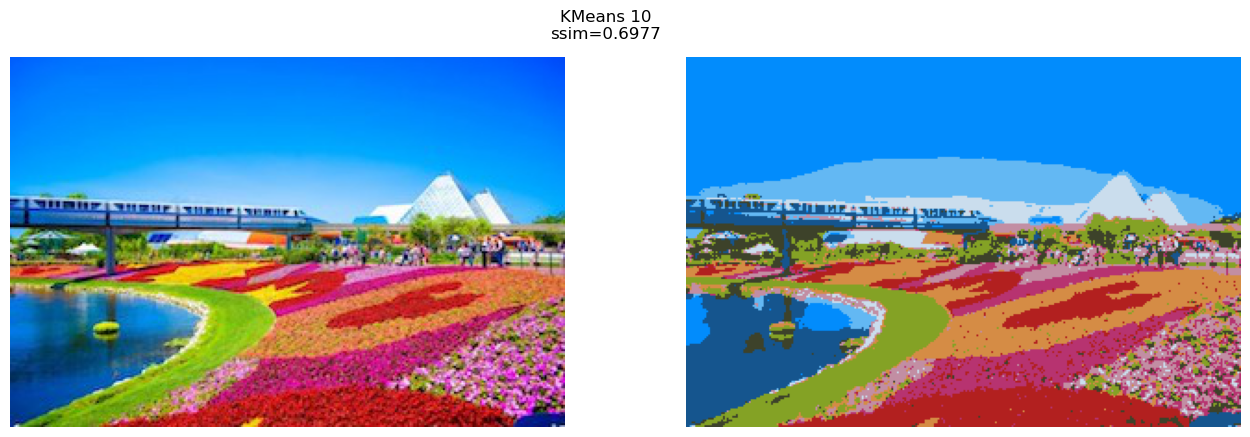

/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


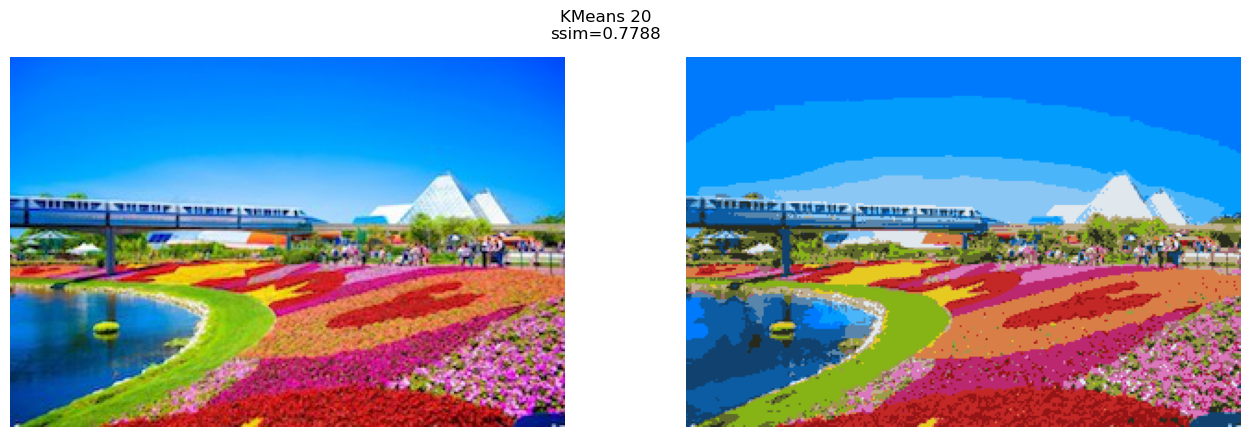

In [8]:
for n in [2, 5, 10, 20]:
    classify_image(
        KMeans(
            n_clusters=n,
            init='k-means++',
            random_state=1589
        ),
        image,
        f'KMeans {n}')

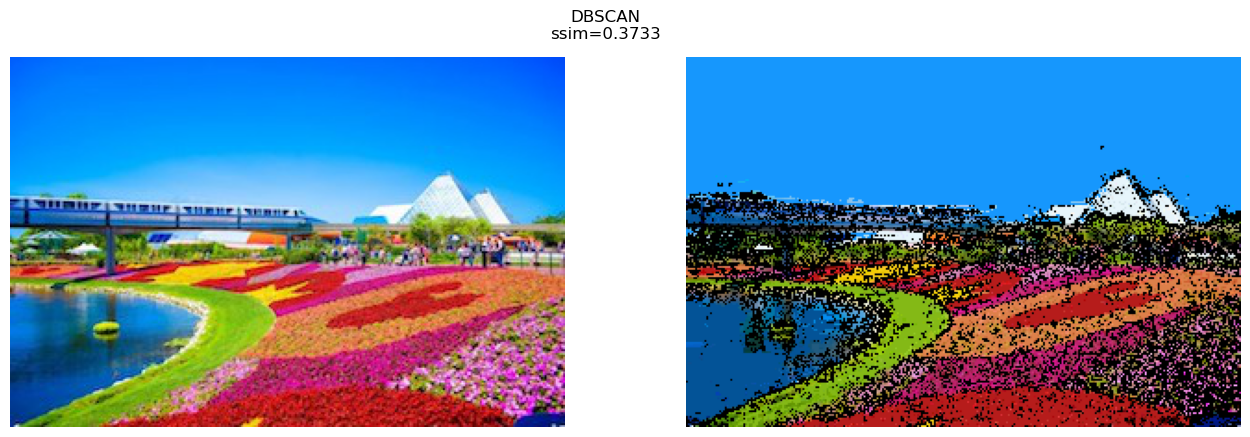

In [9]:
classify_image(
    DBSCAN(
        eps = 3,
        min_samples=2,
        n_jobs=-1
    ),
    image,
    'DBSCAN'
)

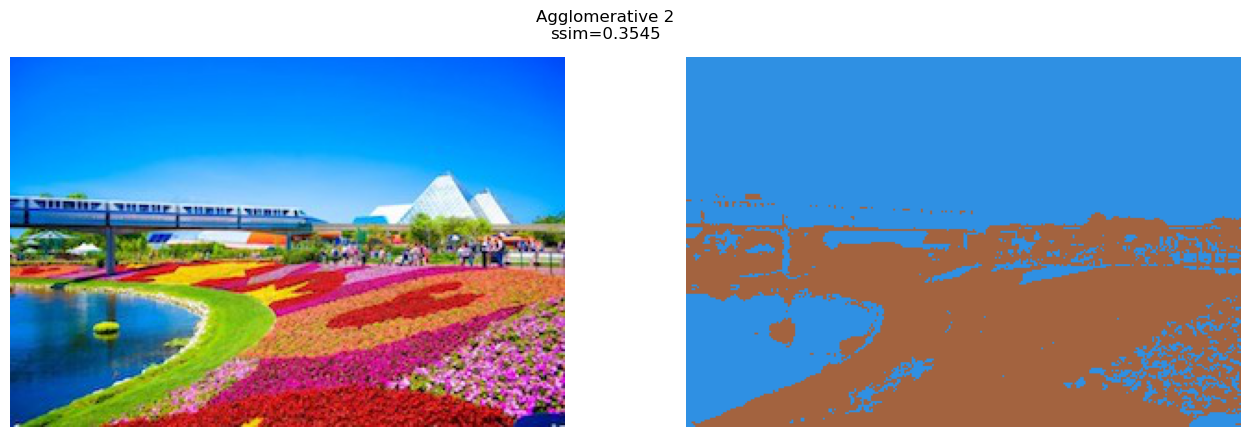

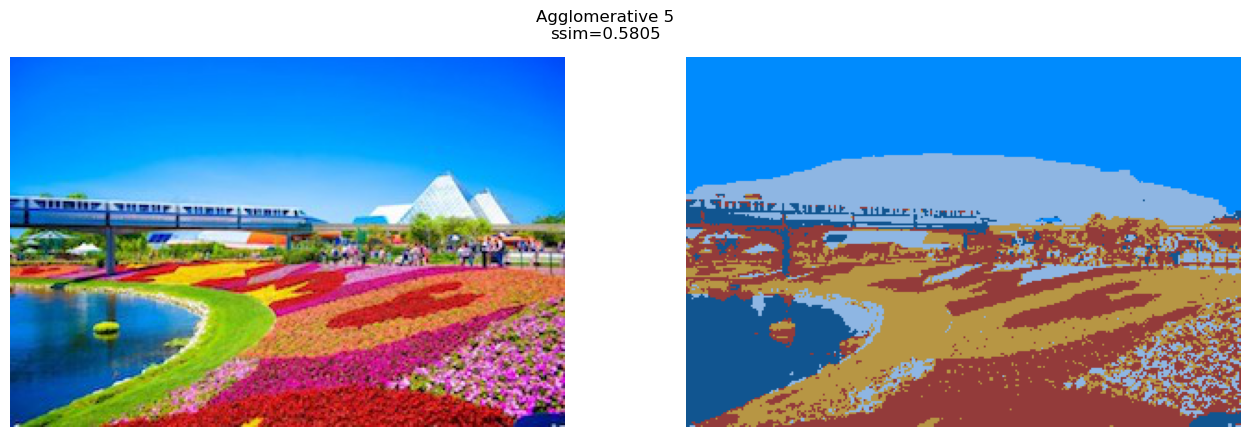

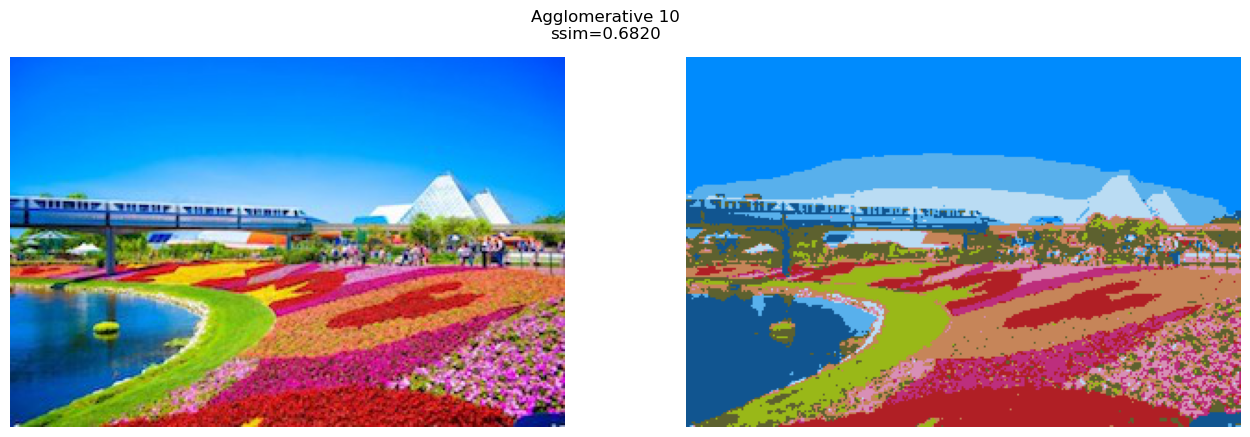

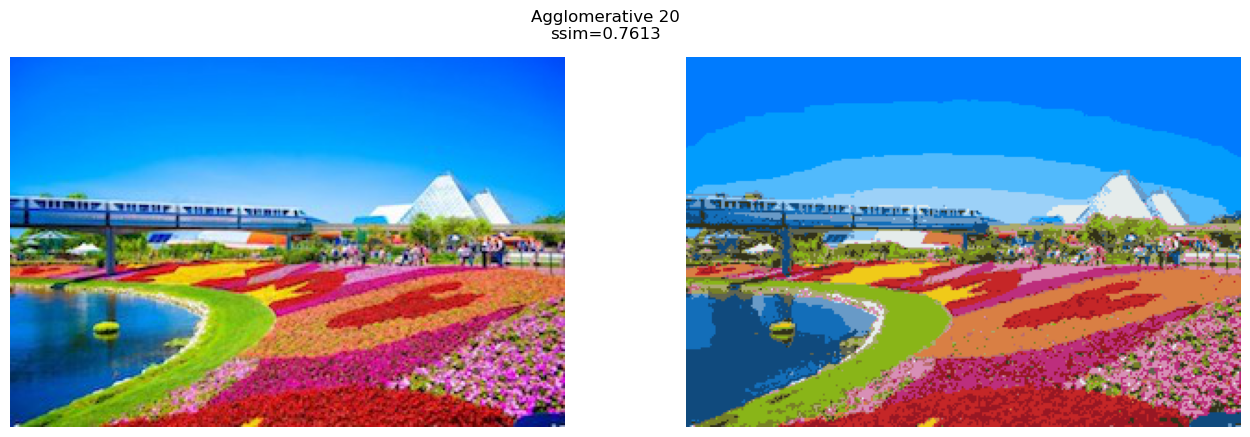

In [10]:
for n in [2, 5, 10, 20]:
    classify_image(
        AgglomerativeClustering(
            n_clusters=n,
            linkage='ward',
            memory='.'
        ),
        image,
        f'Agglomerative {n}'
)

# Выводы

In [22]:
models.sort(key=lambda x: x[1], reverse=True)
for (name, ssim)  in models:
    print(f'Модель {name:20s}\t ssim={ssim:0.4f}')

Модель KMeans 20           	 ssim=0.7788
Модель Agglomerative 20    	 ssim=0.7613
Модель KMeans 10           	 ssim=0.6977
Модель Agglomerative 10    	 ssim=0.6820
Модель Agglomerative 5     	 ssim=0.5805
Модель KMeans 5            	 ssim=0.5188
Модель DBSCAN              	 ssim=0.3733
Модель Agglomerative 2     	 ssim=0.3545
Модель KMeans 2            	 ssim=0.3343


Ожидаемо вперед вышли модели с большим количеством кластеров.

Для DBSCAN мне так и не удалось подобрать оптимальные параметры. Либо много пропусков, либо много объектов относились в один класс. Был вариант дать ему построить модель на 1000+ кластеров, но мне показалось это бесмыслицей.
